In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[27.07041612] -3.477821749649476


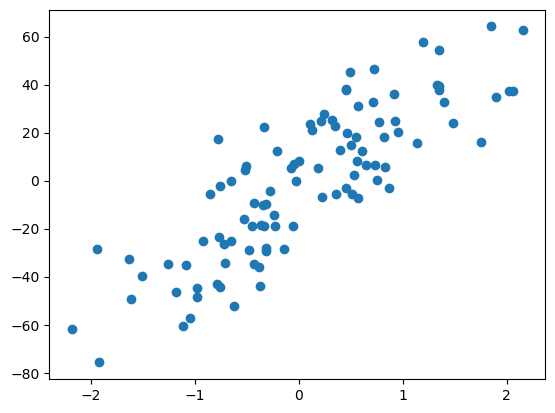

In [3]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X, y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_, reg.intercept_)

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+04, tolerance: 7.167e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

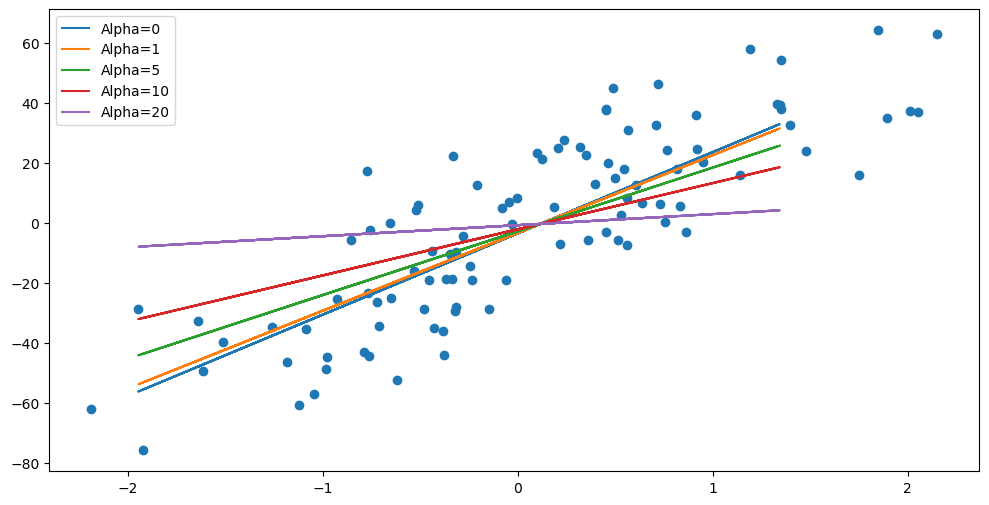

In [4]:
alphas = [0, 1, 5, 10, 20]
plt.figure(figsize=(12, 6))
plt.scatter(X, y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train, y_train)
    plt.plot(X_test, L.predict(X_test), label=f"Alpha={i}")

plt.legend()
plt.show()

## Using on PolyNomial

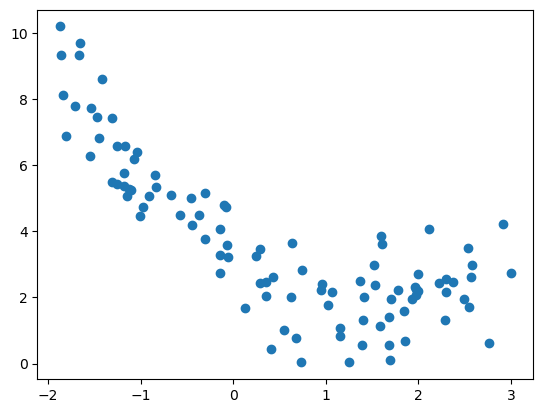

In [5]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2  * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.172e+01, tolerance: 5.576e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

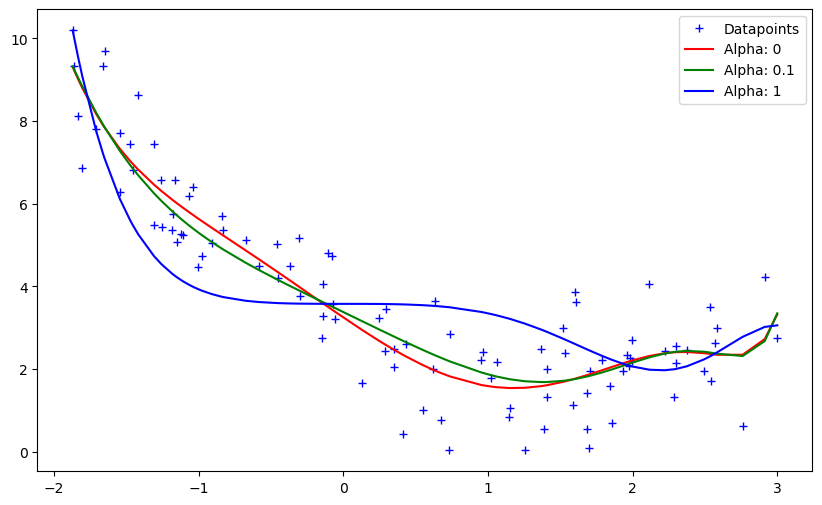

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ("poly_feats", PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha= alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10,6))
plt.plot(x1, x2, 'b+', label="Datapoints")

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:,0])], c, label=f"Alpha: {alpha}")
    
plt.legend()
plt.show()


## Creating Own Lasso

### 1. How are coefficients affected?|

In [7]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [8]:
data = load_diabetes()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [10]:
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

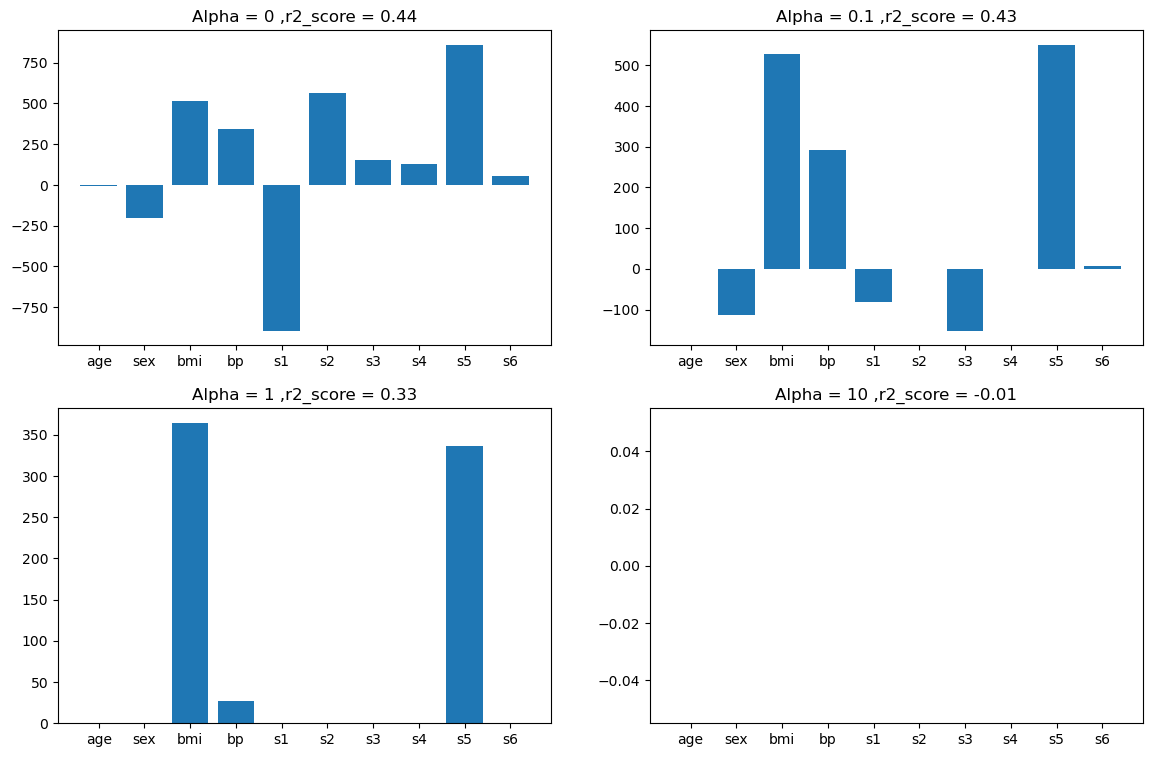

In [11]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

In [12]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

In [13]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [75]:
df = pd.read_csv('datasets/placement.csv')

In [76]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [77]:
X = df.iloc[:,0:1]
y = df.iloc[:, -1]

In [78]:
X, y

(     cgpa
 0    6.89
 1    5.12
 2    7.82
 3    7.42
 4    6.94
 ..    ...
 195  6.93
 196  5.89
 197  7.21
 198  7.63
 199  6.22
 
 [200 rows x 1 columns],
 0      3.26
 1      1.98
 2      3.25
 3      3.67
 4      3.57
        ... 
 195    2.46
 196    2.57
 197    3.24
 198    3.96
 199    2.33
 Name: package, Length: 200, dtype: float64)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

[0.55795197] -0.8961119222429144


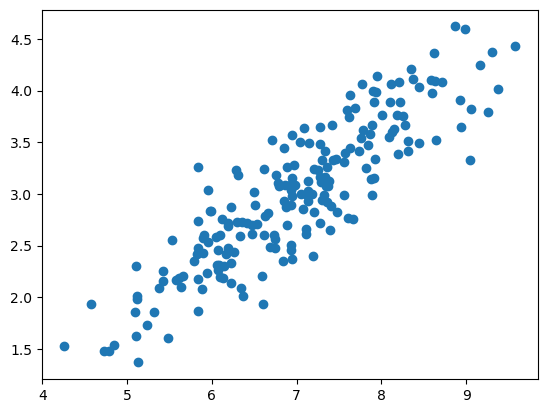

In [83]:
plt.scatter(X, y)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_, reg.intercept_)

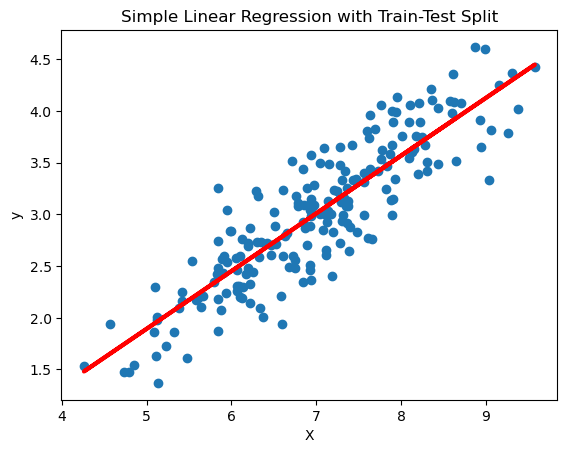

In [85]:
y_pred = reg.predict(X_train)

plt.scatter(X, y)
plt.plot(X_train, y_pred, color='red', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression with Train-Test Split')
plt.show()

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(y_test, reg.predict(X_test))

0.780730147510384

In [95]:
## Using Lasso

from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)

Lasso(alpha=0.1)

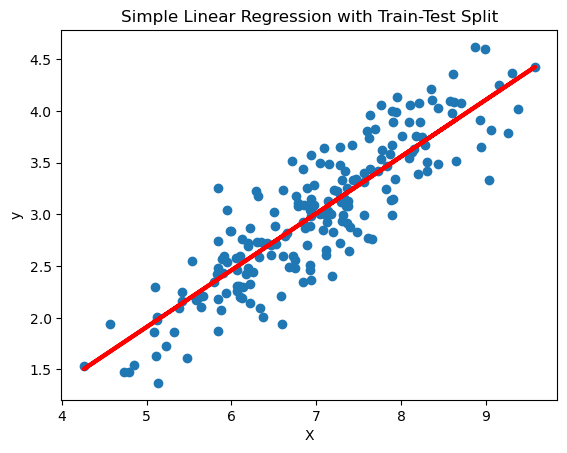

In [94]:
y_pred = ls.predict(X_test)

plt.scatter(X, y)
plt.plot(X_train, ls.predict(X_train), color='red', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression with Train-Test Split')
plt.show()

In [91]:
r2_score(y_test, y_pred)

0.7433706485836674

In [201]:
class MeraLasso:
    
    def __init__(self, alpha = 0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X_train, y_train):
        # Calculate coefficients using a simple linear regression approach (not actual Lasso)
        X_mean = np.mean(X_train)
        y_mean = np.mean(y_train)
        num = np.sum((X_train - X_mean) * (y_train - y_mean))
        den = np.sum((X_train - X_mean) ** 2)
        self.coef_ = num / den
        self.intercept_ = y_mean - (self.coef_ * X_mean)

        # Adjust coef_ using a simple approach to mimic Lasso penalty
        # This is a heuristic approach and not how actual Lasso works
        if self.coef_ > 0:
            self.coef_ = max(0, (num - self.alpha)/den)
        else:
            self.coef_ = min(0, (num + self.alpha)/den)
        
        
    
    def predict(self, X_test):
        return self.coef_ * X_test + self.intercept_

In [202]:
alphas = [0.1, 1, 10, 100, 1000, 10000]

ans = []

for alpha in alphas:
    ls = Lasso(alpha=alpha)
    ls.fit(X_train, y_train)
    ans.append(ls.coef_)
    
pd.DataFrame(ans)

,0
0,0.469742
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000


In [203]:
mr = MeraLasso(alpha=0.1)

In [204]:
mr.fit(np.array(X_train), np.array(y_train))

In [205]:
mr.intercept_ ,mr.coef_ 

(3.0039375000000006, 0)

In [192]:
reg = LinearRegression()

reg.fit(X_train, y_train)
reg.intercept_, reg.coef_

(-0.8961119222429144, array([0.55795197]))

In [206]:
ls = Lasso(alpha=0.1)

ls.fit(X_train, y_train)
ls.intercept_, ls.coef_

(-0.27952671024648845, array([0.46974157]))

In [194]:
alphas = [0.1, 1, 10, 100, 1000, 10000]

ans = []

for alpha in alphas:
    ls = Lasso(alpha=alpha)
    ls.fit(X_train, y_train)
    ans.append(ls.coef_)
    
pd.DataFrame(ans)

,0
0,0.469742
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000


In [195]:
alphas = [0.1, 1, 10, 100, 1000, 10000]

ans = []

for alpha in alphas:
    mr = MeraLasso(alpha=alpha)
    mr.fit(np.array(X_train), np.array(y_train))
    ans.append(mr.coef_)
    
pd.DataFrame(ans)

,0
0,0
1,0
2,0
3,0
4,0
5,0


In [176]:
mr.coef_

array([-54.57355063])